In [0]:
# Basic osrs API: https://www.reddit.com/r/2007scape/comments/3g06rq/guide_using_the_old_school_ge_page_api/
# IDs: https://pastebin.com/LhxJ7GRG
# API: https://runescape.fandom.com/wiki/Application_programming_interface
# IDs++: https://rsbuddy.com/exchange/summary.json

In [0]:
import requests
import time

url = "http://services.runescape.com/m=itemdb_oldschool/api/graph/245.json"

r = requests.get(url)

text = r.text
test = r.json()

for x in test["daily"]:
   print(time.strftime("%d %b", time.localtime(int(x)/1000)))

29 Sep
30 Sep
01 Oct
02 Oct
03 Oct
04 Oct
05 Oct
06 Oct
07 Oct
08 Oct
09 Oct
10 Oct
11 Oct
12 Oct
13 Oct
14 Oct
15 Oct
16 Oct
17 Oct
18 Oct
19 Oct
20 Oct
21 Oct
22 Oct
23 Oct
24 Oct
25 Oct
26 Oct
27 Oct
28 Oct
29 Oct
30 Oct
31 Oct
01 Nov
02 Nov
03 Nov
04 Nov
05 Nov
06 Nov
07 Nov
08 Nov
09 Nov
10 Nov
11 Nov
12 Nov
13 Nov
14 Nov
15 Nov
16 Nov
17 Nov
18 Nov
19 Nov
20 Nov
21 Nov
22 Nov
23 Nov
24 Nov
25 Nov
26 Nov
27 Nov
28 Nov
29 Nov
30 Nov
01 Dec
02 Dec
03 Dec
04 Dec
05 Dec
06 Dec
07 Dec
08 Dec
09 Dec
10 Dec
11 Dec
12 Dec
13 Dec
14 Dec
15 Dec
16 Dec
17 Dec
18 Dec
19 Dec
20 Dec
21 Dec
22 Dec
23 Dec
24 Dec
25 Dec
26 Dec
27 Dec
28 Dec
29 Dec
30 Dec
31 Dec
01 Jan
02 Jan
03 Jan
04 Jan
05 Jan
06 Jan
07 Jan
08 Jan
09 Jan
10 Jan
11 Jan
12 Jan
13 Jan
14 Jan
15 Jan
16 Jan
17 Jan
18 Jan
19 Jan
20 Jan
21 Jan
22 Jan
23 Jan
24 Jan
25 Jan
26 Jan
27 Jan
28 Jan
29 Jan
30 Jan
31 Jan
01 Feb
02 Feb
03 Feb
04 Feb
05 Feb
06 Feb
07 Feb
08 Feb
09 Feb
10 Feb
11 Feb
12 Feb
13 Feb
14 Feb
15 Feb
16 Feb
17 Feb
18 Feb

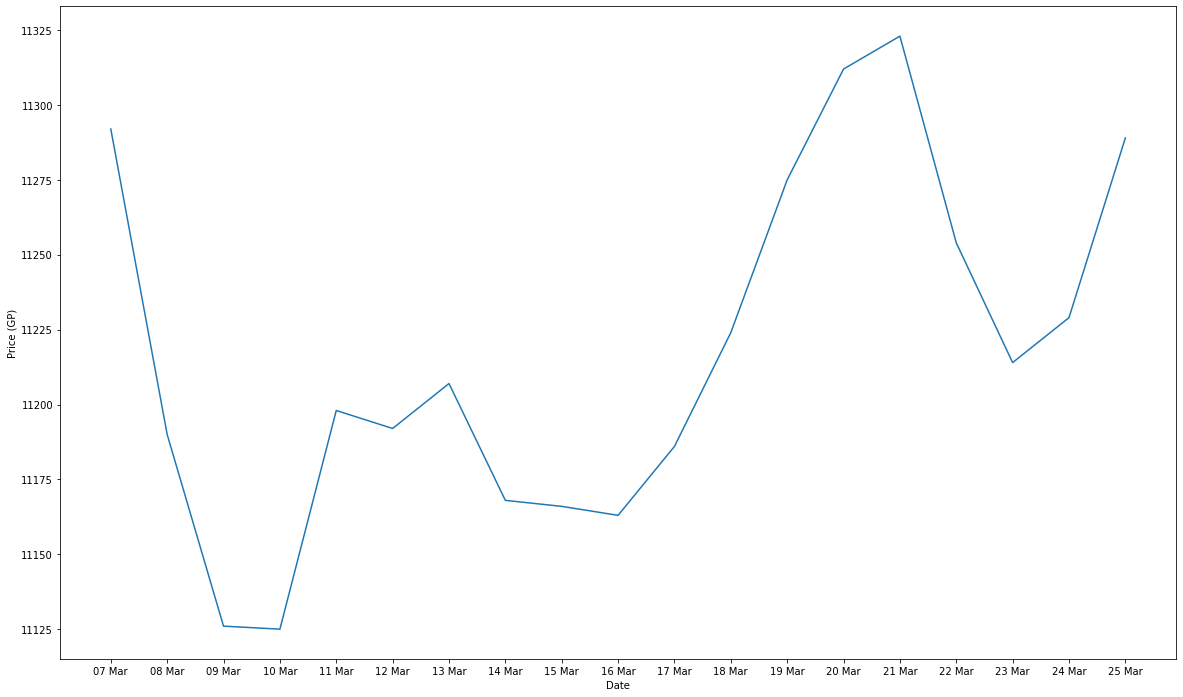

In [0]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]

#554 Fire rune
#245 Wine of zamorak
#449 Adamantite ore
#451 Runite ore
#13190 Bond
url = "http://services.runescape.com/m=itemdb_oldschool/api/graph/451.json"
# format: "Epoch Time: Item Value"
r = requests.get(url)
json = r.json()

price = []
for x in json["daily"].values():
    price.append(x)

date = []
for x in test["daily"]:
    date.append(time.strftime("%d %b", time.localtime(int(x)/1000)))
    
#x = np.linspace(0,len(List)-1,len(List))

plt.plot(date[160:179], price[160:179])
plt.xlabel("Date")
plt.ylabel("Price (GP)")

plt.show()

In [0]:
import requests

# Hente ut items som begynner på g... hva er category?
url = "http://services.runescape.com/m=itemdb_oldschool/api/catalogue/items.json?category=1&alpha=g"
r = requests.get(url)
json = r.json()

print(json)

{'total': 3687, 'items': [{'icon': 'http://services.runescape.com/m=itemdb_oldschool/1585222191911_obj_sprite.gif?id=7668', 'icon_large': 'http://services.runescape.com/m=itemdb_oldschool/1585222191911_obj_big.gif?id=7668', 'id': 7668, 'type': 'Default', 'typeIcon': 'http://www.runescape.com/img/categories/Default', 'name': 'Gadderhammer', 'description': 'A specially crafted hammer with strange markings on it.', 'current': {'trend': 'neutral', 'price': '1,342'}, 'today': {'trend': 'neutral', 'price': 0}, 'members': 'true'}, {'icon': 'http://services.runescape.com/m=itemdb_oldschool/1585222191911_obj_sprite.gif?id=3853', 'icon_large': 'http://services.runescape.com/m=itemdb_oldschool/1585222191911_obj_big.gif?id=3853', 'id': 3853, 'type': 'Default', 'typeIcon': 'http://www.runescape.com/img/categories/Default', 'name': 'Games necklace(8)', 'description': 'An enchanted necklace.', 'current': {'trend': 'neutral', 'price': 871}, 'today': {'trend': 'negative', 'price': '- 9'}, 'members': 't

1.15.2


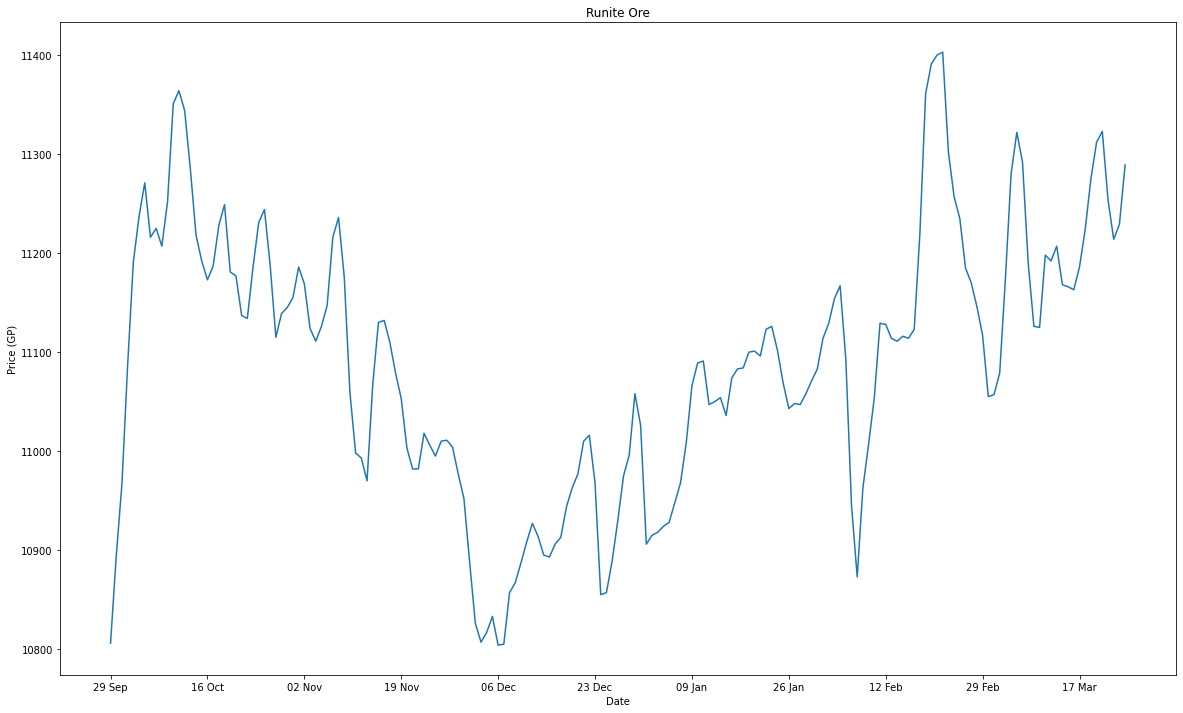

In [0]:
# Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

print(tf.__version__)

# Plot size
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]

# URL for #451 Runite ore data
url = "http://services.runescape.com/m=itemdb_oldschool/api/graph/451.json"
# format: "Epoch Time: Item Value" - Pervious 180 days
r = requests.get(url)
json = r.json()

# Temporary solution
price = []
for x in json["daily"].values():
    price.append(x)

# Temporary solution
date = []
for x in test["daily"]:
    date.append(time.strftime("%d %b", time.localtime(int(x)/1000)))

plt.plot(date[0:179], price[0:179])
plt.xlabel("Date")
plt.ylabel("Price (GP)")
# Space between dates
plt.title("Runite Ore")
plt.xticks(np.arange(0, 179, step=17))
plt.show()

In [0]:
# Trenger muligens bare pris
data = [date, price]

# Trenger muligens bare pris
#Train_data = [[row[0:17] for row in data]]
#Test_data = [[row[17:18] for row in data]]

# Normalise - ikke sikkert dette er gjort rett
#norm_price = price/max(price) - funker ikke
norm_price = [x/max(price) for x in price]

# Videre kan du "slide" deg bortover
Train_data = norm_price[0:17]
Test_data = norm_price[17:18]

#print(Train_data)
